- **Name:** Marvin D. LLames
- **Term:** 2nd Year - Term 2

# Problem Set 004: Secant Method

Apart from the lack of control on global convergence, the other annoying aspect of Newton's iteration is the requirement that we compute a derivative.  In some cases, we may not have the derivative in closed form; or perhaps we just can't be bothered.  In either case, we can approximate a derivative by finite differences:
$$
  f'(x) \approx \frac{f(x+h)-f(x)}{h}.
$$
In the setting of root finding, it is natural to use a derivative approximation based on the last two steps of the iteration.  This gives us the *secant iteration*:
$$
  x_{k+1} = x_k - \frac{f(x_k)(x_{k}-x_{k-1})}{f(x_k)-f(x_{k-1})}.
$$
The secant iteration is superlinearly convergent, though not quadratically convergent.  Unlike Newton iteration, secant iteration needs *two* starting points for the iteration; but if we start with an interval $[a,b]$ over which $f$ experiences a sign change, it is reasonable to use $a$ and $b$ as the starting points for the iteration.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [4]:
f = lambda x: np.exp(-x) - x

x_root = fsolve(f, 0.5)[0]  # Initial guess of 0.5
print("Root: " + str(x_root))

Root: 0.5671432904097811


We know that this function has one root $x = 0.56714329$, therefore, we can get the root out fairly simple using the *f_solve* function. 

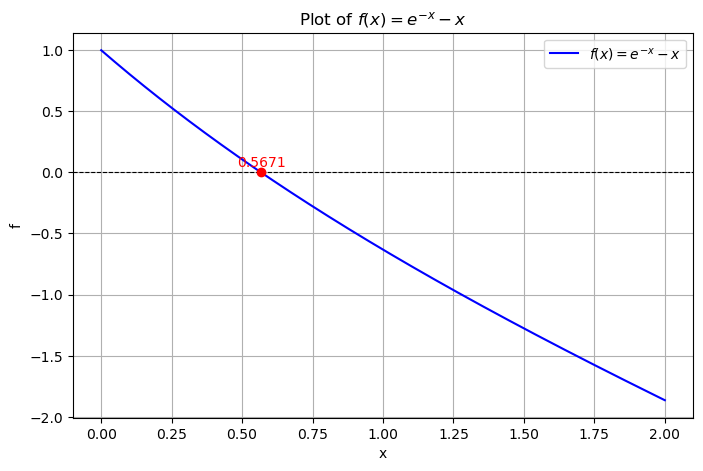

In [7]:
# Plot the function
x = np.linspace(0, 2, 500)
y = np.exp(-x) - x

plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.title("Plot of $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f")
plt.grid(True)
plt.legend()
plt.scatter(x_root, 0, color='red', zorder=3, label=f'Intersection at x = {x_root:.4f}')
plt.text(x_root, 0.05, f'{x_root:.4f}', ha='center', color='red', fontsize=10)
plt.show()

Let's first try this manually with the function $f(x) = e^{-x} - x$ and its derivative $f'(x) = -e^{-x} - 1$. Define these functions first:

In [10]:
# Define the function
def f(x):
    return np.exp(-x) - x

**TRY IT!** Write a function $newton\_raphson\_method(f, df, x0, tol)$, where the output is an estimation of the root of *f*, *f* is a function object $f(x)$, *df* is a function object to $f^{\prime}(x)$, *x0* is an initial guess, and *tol* is the error tolerance. The error measurement should be $|f(x)|$.

In [13]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = 0
    roots = [x0, x1]  # Store intermediate root values
    
    while abs(f(x1)) > tol and iterations < max_iter:
        x_temp = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x_temp
        roots.append(x1)  # Store each iteration's root
        iterations += 1
    
    return x1, iterations, roots

# Initial guesses
x0, x1 = 0, 1
root_secant, iter_secant, roots = secant_method(f, x0, x1)

print(f"Secant Method: Root = {root_secant:.6f}, Iterations = {iter_secant}")
for i, r in enumerate(roots):
    print(f"Iteration {i}: Root = {r:.6f}")

Secant Method: Root = 0.567143, Iterations = 4
Iteration 0: Root = 0.000000
Iteration 1: Root = 1.000000
Iteration 2: Root = 0.612700
Iteration 3: Root = 0.563838
Iteration 4: Root = 0.567170
Iteration 5: Root = 0.567143


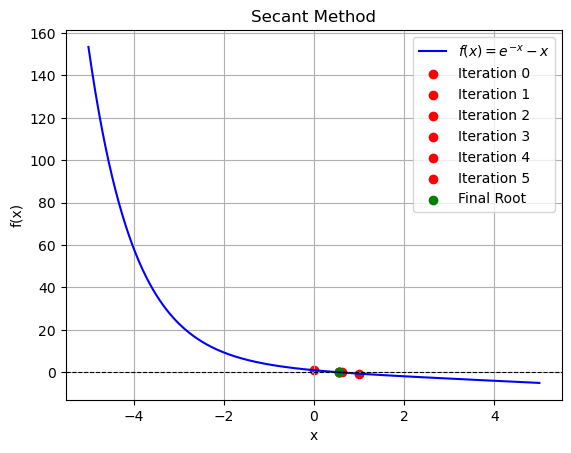

In [15]:
# Plot the function
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Plot each iteration's root
for i, r in enumerate(roots):
    plt.scatter(r, f(r), color='red', marker='o', label=f'Iteration {i}')

# Highlight final root
plt.scatter(root_secant, f(root_secant), color='green', marker='o', label='Final Root')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant Method')
plt.legend()
plt.grid()
plt.show()

Unfortunately, secant iteration can still go astray.  Fortunately, secant iteration can be *safeguarded* by combining it with bisection to get both speed and robustness.  The basic idea is:

- At each step, maintain an interval over which there is a sign change (as with bisection).
- If secant iteration is rapidly converging, try taking a new point via a secant step.
- If the secant iteration falls out of bounds, or if the iteration has not improved the bounding interval sufficiently in the past few steps, consider a new point based on bisection.
- After choosing a next point, compare signs with the endpoints of the previous interval in order to get a smaller bracketing interval.